In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
np.set_printoptions(precision=2)

In [102]:
df = pd.read_csv("homeprices.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [103]:
dummies = pd.get_dummies(df.town)
dummies

,monroe township,robinsville,west windsor
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
5,False,False,True
6,False,False,True
7,False,False,True
8,False,False,True
9,False,True,False


In [104]:
merged_df = pd.concat([df, dummies], axis=1)
merged_df

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,True,False,False
1,monroe township,3000,565000,True,False,False
2,monroe township,3200,610000,True,False,False
3,monroe township,3600,680000,True,False,False
4,monroe township,4000,725000,True,False,False
5,west windsor,2600,585000,False,False,True
6,west windsor,2800,615000,False,False,True
7,west windsor,3300,650000,False,False,True
8,west windsor,3600,710000,False,False,True
9,robinsville,2600,575000,False,True,False


In [105]:
# drop any one dummy variable that can be derived from the rest to avoid dummy trap
final_df = merged_df.drop(["town", "west windsor"], axis=1) 
final_df

,area,price,monroe township,robinsville
0,2600,550000,True,False
1,3000,565000,True,False
2,3200,610000,True,False
3,3600,680000,True,False
4,4000,725000,True,False
5,2600,585000,False,False
6,2800,615000,False,False
7,3300,650000,False,False
8,3600,710000,False,False
9,2600,575000,False,True


In [106]:
X_train = final_df.drop(["price"], axis=1)
X_train

,area,monroe township,robinsville
0,2600,True,False
1,3000,True,False
2,3200,True,False
3,3600,True,False
4,4000,True,False
5,2600,False,False
6,2800,False,False
7,3300,False,False
8,3600,False,False
9,2600,False,True


In [107]:
Y_train = final_df.price
Y_train

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [108]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [109]:
b = model.intercept_
w = model.coef_
print(f"model parameters: w: {w}, b:{b}")

model parameters: w: [   126.9  -40013.98 -14327.56], b:249790.36766292527


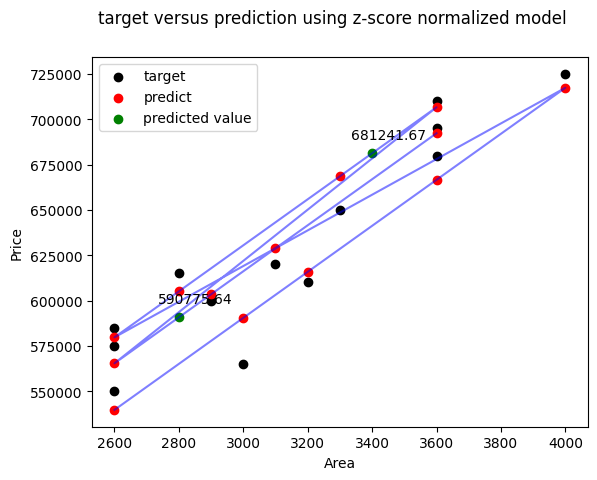

In [112]:
# plot predictions and targets vs original features  
input_features = pd.DataFrame([[2800, 0, 1], [3400, 0, 0]], columns=X_train.columns)
prediction = model.predict(input_features)

plt.scatter(X_train.area, Y_train, color="black", label='target')
plt.xlabel("Area")
plt.scatter(X_train.area, model.predict(X_train), color="red", label='predict')
plt.plot(X_train.area, model.predict(X_train), color="blue", alpha=0.5)
plt.scatter(input_features["area"], prediction, color="green", label='predicted value')  # Scatter plot for predicted values
for i, txt in enumerate(prediction):
    plt.annotate(f'{txt:.2f}', (input_features["area"].iloc[i] + 50, txt), textcoords="offset points", xytext=(0,10), ha='center')
plt.ylabel("Price")
plt.legend()
plt.suptitle("target versus prediction using z-score normalized model")
plt.show()


In [ ]:
model.score(X_train, Y_train)

0.9573929037221872